# Using Vectors and Matrices

This notebook is intended as a introduction to the representation of data in vectors and matrices, in the context of our modeling problem. The goal is to translate the physical system into precise mathematical instructions for the computer to follow.

First, let's think carefully about how to organize all the components of our system. As a brief aside, ordered lists in python always start counting at 0. So for consistency, we will always list our tanks A through D, with "indices" 0 through 3. So instead of a single volume $v$, we will indicate a list of volumes $\mathbf{v}$ in bold. These lists are also called "vectors." Subscripts will represent index; $\mathbf{v}_0$ is the volume of tank A, etc. Similarly, we will need a list of concentrations $\mathbf{c}$, and we will want to solve for $\mathbf{c}'$. Our new roadmap is very familiar:
$$\mathbf{c}'=f(\mathbf{c})\longrightarrow\mathbf{c} = g(t)$$
Let's start with considering a single tank, and see how the situation differs from that above. We want to be especially careful in how we define our volumetric flows; clearly, "in" and "out" will not suffice. As with our concentrations and volumes, we can use the indices 0 through 3 to represent tanks, but notice for flows we need _two_ indices, since each flow represents a relationship between two tanks. And the ordered of those indices matters; flow from tank A to B is not the same as from B to A! We can still use the letter $q$, but we'll set the first index as the sink and the second index as the source. In other words, $q_{ij}$ is the flow rate from tank $j$ to tank $i$: $q_{32}$ is from C to D, etc. Let's look at an equation for just one of the tanks, A. As before, the left side will be the relevant volume times the change in concentration: $\mathbf{v}_0\mathbf{c}'_0.$ And on the right, we'll want to account for all the inflows and (negative) outflows, each multiplied by the concentration of their source:

$$q_{01}\mathbf{c}_1 + q_{02}\mathbf{c}_2 + q_{03}\mathbf{c}_3-q_{10}\mathbf{c}_0-q_{20}\mathbf{c}_0-q_{30}\mathbf{c}_0$$

As we put the left and right together, we can collect like terms: all the outflows have the same concentration $(\mathbf{c}_0)$. We will find it convenient to rearrange so all the $\mathbf{c}$ terms are listed in order of their indices:

$$\mathbf{v}_0\mathbf{c}'_0 = \mathbf{c}_0(-q_{10}-q_{20}-q_{30}) + \mathbf{c}_1q_{01} + \mathbf{c}_2q_{02} + \mathbf{c}_3q_{03}$$

We can repeat this process for the other three tanks, and hopefully begin to see some patterns emerging:

$$\begin{gather*}
	\mathbf{v}_0\mathbf{c}'_0= 
	\mathbf{c}_0(-q_{10}-q_{20}-q_{30}) + \mathbf{c}_1q_{01} + \mathbf{c}_2q_{02} + \mathbf{c}_3q_{03}\\
	\mathbf{v}_1\mathbf{c}'_1= 
	\mathbf{c}_0q_{10} + \mathbf{c}_1(-q_{01}-q_{21}-q_{31}) + \mathbf{c}_2q_{12} + \mathbf{c}_3q_{13}\\
	\mathbf{v}_2\mathbf{c}'_2=  
	\mathbf{c}_0q_{20} + \mathbf{c}_1q_{21} + \mathbf{c}_2(-q_{02}-q_{12}-q_{32}) + \mathbf{c}_3q_{23}\\
	\mathbf{v}_3\mathbf{c}'_3=  
	\mathbf{c}_0q_{30} + \mathbf{c}_1q_{31} + \mathbf{c}_2q_{32} + \mathbf{c}_3(-q_{03}-q_{13}-q_{23})\\
\end{gather*}$$

Those factored terms on the right can be tricky to read around, but hopefully the column vectors $\mathbf{c}$ and $\mathbf{v}$ start to emerge on the left. And with the right side of each equation arranged by factors of $\mathbf{c}$ terms, you may be tempted to make the following transformation... (don't worry if you haven't seen something like this before, just make sure you can see where each term went)

$$\begin{bmatrix}
		\mathbf{v}_0 \\ \mathbf{v}_1 \\ \mathbf{v}_2 \\ \mathbf{v}_3
	\end{bmatrix}
	\begin{bmatrix}
		\mathbf{c}_0 \\ \mathbf{c}_1 \\ \mathbf{c}_2 \\ \mathbf{c}_3
	\end{bmatrix}' =
	\mathbf{c}_0
	\begin{bmatrix}
		-q_{10}-q_{20}-q_{30} \\ q_{10} \\ q_{20} \\ q_{30}
 	\end{bmatrix} + 
 	\mathbf{c}_1
	\begin{bmatrix}
		q_{01} \\ -q_{01}-q_{21}-q_{31} \\  q_{21} \\ q_{31}
 	\end{bmatrix} + 
 	\mathbf{c}_2
	\begin{bmatrix}
		q_{02} \\ q_{12} \\-q_{02}-q_{12}-q_{32} \\ q_{32}
 	\end{bmatrix} + 
 	\mathbf{c}_3
	\begin{bmatrix}
		q_{03} \\ q_{13} \\ q_{23} \\-q_{03}-q_{13}-q_{23} 
 	\end{bmatrix}$$

Admittedly, this doesn't look much better. However, you should take note that the right side of our equation is something very special. We have four columns, eached scaled by some $\mathbf{c}$ term, and then added together. This is called a "linear combination" of those four columns, and this procedure appears all over the place in mathematics, science, engineering, and data analysis. A fact worth remembering is that a matrix-vector product is a linear combination of the columns of that matrix. That means those four columns can be grouped together as a matrix $Q$ (matrices get capital letters) which multiplies a vector $\mathbf{c}$. Let's see that:

$$	\begin{bmatrix}
		\mathbf{v}_0 \\ \mathbf{v}_1 \\ \mathbf{v}_2 \\ \mathbf{v}_3
	\end{bmatrix}
	\begin{bmatrix}
		\mathbf{c}_0 \\ \mathbf{c}_1 \\ \mathbf{c}_2 \\ \mathbf{c}_3
	\end{bmatrix}' = \underbrace{
	\begin{bmatrix}
		-q_{10}-q_{20}-q_{30} & q_{01} & q_{02} & q_{03}\\ 
		q_{10} & -q_{01}-q_{21}-q_{31} & q_{12} & q_{13}\\ 
		q_{20} & q_{21} & -q_{02}-q_{12}-q_{32} & q_{23}\\ 
		q_{30} & q_{31} & q_{32} & -q_{03}-q_{13}-q_{23}
 	\end{bmatrix}}_Q
 	\begin{bmatrix}
 		\mathbf{c}_0 \\ \mathbf{c}_1 \\ \mathbf{c}_2 \\ \mathbf{c}_3
 	\end{bmatrix}$$

Let's clean this up a bit, with a little reminder of what this represents in our "roadmap:"

$$\mathbf{vc}'=Q\mathbf{c};\qquad \boxed{\mathbf{c}'=f(\mathbf{c}) = (Q\mathbf{c})/\mathbf{v}.}$$

Here it is in python, after importing some useful modules:


In [1]:
import numpy as np # computing
from numpy import linalg as LA # linear algebra
from scipy.integrate import odeint # ordinary differential equations
from scipy.linalg import expm # matrix exponentiation
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots

# - - - - - - - - - - - - - - - - - - - 

# define system for physical circulation
def sys_phys(c, t): # a function of c (could also depend on time) 
    return flow_rate @ c / v # compute c' = f(c)

## Constructing & Analyzing $Q$
You may be wondering why we went to all this trouble. Let's see if we can derive any new insights from this representation using vectors and matrices. First, notice that $q_{ij}$ (the flow from tank $j$ to tank $i$) has become the entry of $Q$ in row $i$ and column $j$. That means we can interpret an entire row $i$ as the combination of all flows _into_ tank $i.$ That should make sense based on how our original equations were transformed into rows of $Q$. But what about columns? By the same reasoning, we can interpret each column $j$ as the combination of flows _out of_ tank $j$. If we examine $Q$ closely in the definition above, notice that each column _must_ sum to zero. This is a consequence of the fact that each flow involves exactly two tanks, one for which the net volumetric effect is positive and one for which it is negative. This means we can define $Q$ by manually entering each flow rate only once in the off-diagonal entries, leaving the diagonal with zeros for now. $Q_h$ is used since such a matrix with zero diagonals is sometimes called "hollow:"

$$Q_h = \begin{bmatrix}
		& q_{01} & q_{02} & q_{03}\\ 
		q_{10} & & q_{12} & q_{13}\\ 
		q_{20} & q_{21} & & q_{23}\\ 
		q_{30} & q_{31} & q_{32} &
	\end{bmatrix}$$

Then we define the diagonal terms so that the entries in each column sum to zero, recovering the full $Q$ as defined above. Now let's return to the rows. What is the significance if the entries in a _row_ sum to zero? Remember, each row represents the combination of flows into a tank, so if the sum of all flows is zero, then the total volume of that tank doesn't change. This condition must be satisfied for our model to work, since we set a single parameter for volumes $\mathbf{v}$ which we don't allow to change! That means after defining the full $Q$ matrix such that each _column_ sums to zero, we will want to check that each _row_ sums to zero as well. This is also instantaneous and less error-prone than manually counting each flow rate from the diagram and checking balances (especially if the system were scaled up to more tanks).

Also, notice that any change to the diagonal entries will not change whether the sum of the row equals the sum of the column, since the diagonal entries are exactly those which are added to the same row and column. 

To recap, we first define a "hollow" matrix $Q_h$ with numbers straight from our diagram, each entry $q_{ij}$ being the flow rate from column $j$ to row $i$. Of course, this leaves the diagonals empty since nothing flows to itself. We let python fill in those diagonal terms such that each column sums to zero; that enforces the physical constraint that each flow has equal and opposite effects on exactly two tanks. Then we check that each row also sums to zero, which confirms that the volume of each individual tank doesn't change over time:

In [2]:
# "hollow" flow matrix. row = sink, column = source
hollow_flow_rate = np.array([[0,  2, 0, 6],
               [8,  0, 4, 0],
               [0, 10, 0, 2],
               [0,  0, 8, 0]]) # L/hr

# complete flow matrix. diagonal entries set so columns (axis = 0) sum to zero
flow_rate = hollow_flow_rate - np.diag(hollow_flow_rate.sum(axis = 0)) # L/hr

# show how Q has been constructed
print(flow_rate)

print("- - - - - - - - - - - -")

# Check that each tank volume is fixed
# True for each row that sums to zero
print(f"Balance Check: {flow_rate.sum(axis = 1) == 0}")

[[ -8   2   0   6]
 [  8 -12   4   0]
 [  0  10 -12   2]
 [  0   0   8  -8]]
- - - - - - - - - - - -
Balance Check: [ True  True  True  True]


Feel free to adjust $Q$ as you experiment with the model, but always check the row condition. Also, remember that the original values are meant to capture something about the real ocean. In any case, it's time to solve our system. Remember, we're looking for the computer to perform the transformation $\mathbf{c}'=f(\mathbf{c})\longrightarrow\mathbf{c} = g(t)$, so we can finally predict each concentration $\mathbf{c}$ for some time in the future $t$. We'll first want to define volumes $\mathbf{v}$ and our initial concentrations $\mathbf{c}$. Then the computer solves and plots $\mathbf{c} = g(t)$

[A, B, C, D] =  [2.66666667 2.66666667 2.66666667 2.66666667]


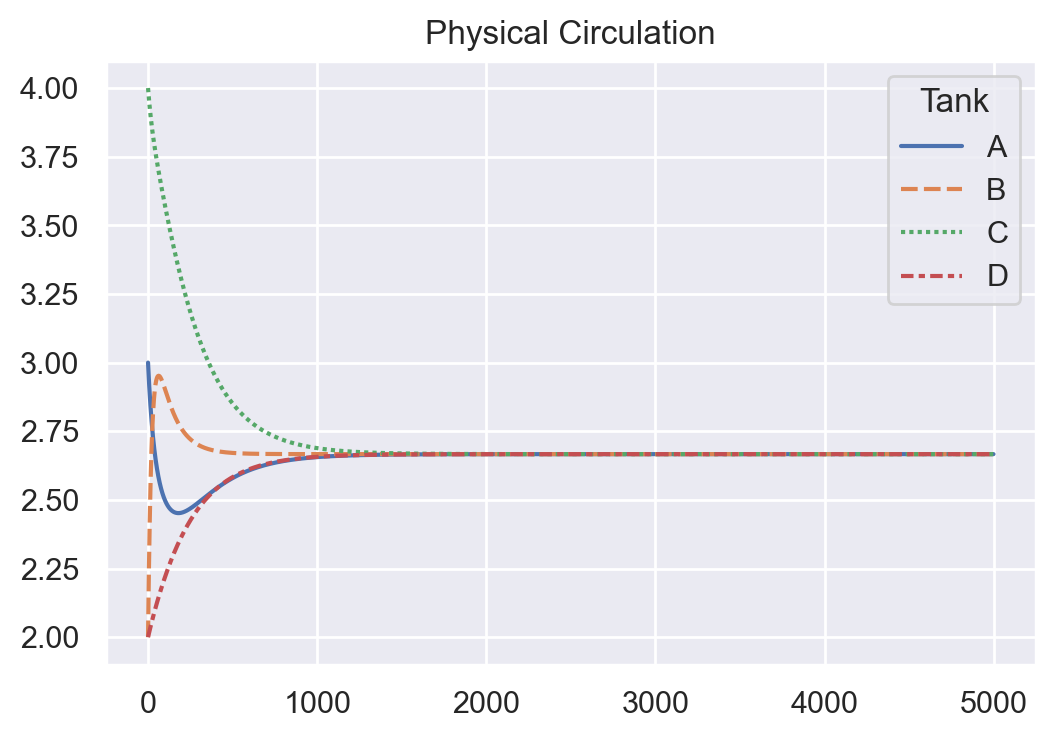

In [4]:
# volume
volume = np.array([600, 300, 3000, 6000]) # L

# initial concentration [PO4]
P0 = [3, 2, 4, 2] # umol/L

# time interval: array of integers from 0 to 5000
t = np.arange(5000) # hr

# solve sys_abio with c = P0 and t = t (set to 5000 hrs at the very beginning)
sol_phys = odeint(sys_phys, P0, t)

# default plot settings
def legend():
    plt.legend(title="Tank", labels=("A","B","C","D"))

# plot
sns.lineplot(data=sol_phys).set(title="Physical Circulation")
legend()

# show final concentrations (roughly steady state)
print("[A, B, C, D] = ", sol_phys[-1])

Steady-state from the beginning: not a huge surprise when all the water has the same concentration. Adjust the initial conditions and run the model again. Get a sense for the model behavior before moving on.


## Incorporating Biogeochemistry

Now, we want to include biogeochemistry: the influence of life. Unlike physical circulation, we have some creative freedom in how we interpret and model biogeochemistry. Let's start with the basics, the aspects of our model where we have the most certainty. When surface algae incorporate phosphate into their tissues, the dissolved amount decreases in their surroundings. When they die and sink to the deep, heterotrophs consume them and remineralize their nutrients, _increasing_ the dissolved amount at depth. The net effect is a net downward nutrient flux. Let's consider how to incorporate this into our model. Just as we've seen before, any flux between tanks should be included as equal and opposite effects. Here, this means _whatever_ negative flux term is associated with a surface tank must be balanced by a positive term in the corresponding deep tank Let's add this process to our physical circulation model:
$$\mathbf{c}' = f(\mathbf{c}) = \boxed{\left(Q \mathbf{c} + \mathbf{b}\right)/\mathbf{v},}\qquad \mathbf{b} = \beta\cdot\begin{bmatrix}-A\\-B\\B\\A\end{bmatrix}$$
Remember, we haven't decided _exactly_ how we want to define $\mathbf{b}$ yet, but we are choosing to enforce a certain _structure._ In particular, we are saying that the nutrient flux from each surface reservoir is going to be proportional ($\beta$ is the proportionality constant) to _something_ in that reservoir. Whatever that something is, it has a value in A and B. And since each flux is headed straight downward, we know the first two terms should be negative and the second two should be the positive counterparts. Here it is in python:

In [3]:
# function to set structure of b
def bio(beta, A, B):
    return beta * np.array([-A, -B, B, A])